In [90]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [91]:
df = pd.read_excel(r"C:\Users\KamalVerma\Downloads\1788410-1767134-1729261-1613779-Red_wine__(1).xlsx")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [94]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [95]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

In [96]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

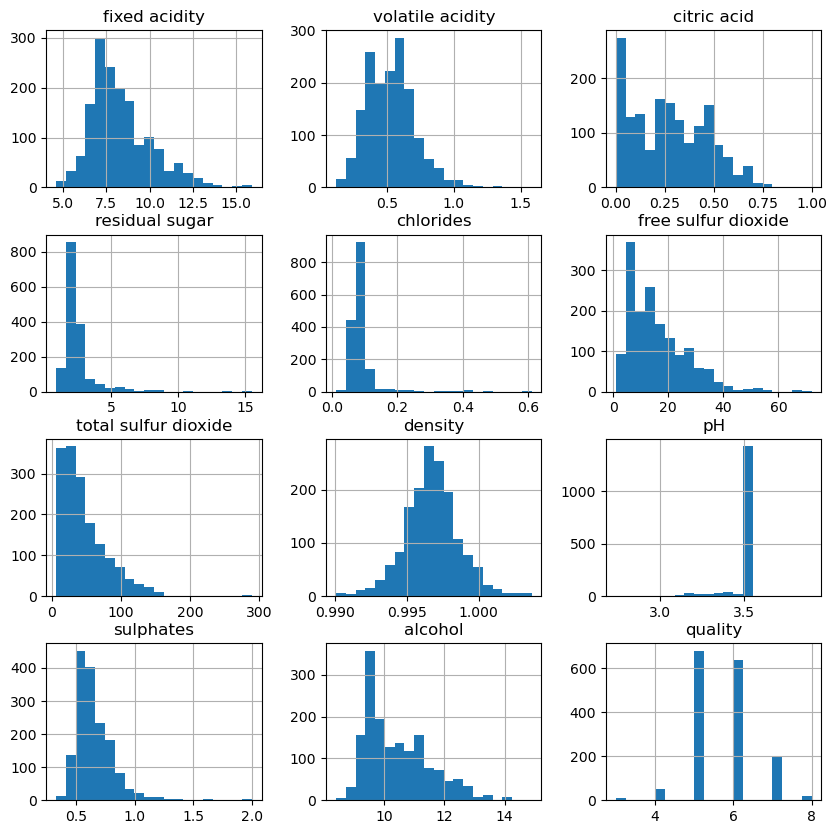

In [97]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [98]:
df['quality'].value_counts()

5.000000    680
6.000000    638
7.000000    199
4.000000     53
8.000000     18
3.000000     10
5.636421      1
Name: quality, dtype: int64

In [99]:
# Finding the row indices where quality is between 5 and 6
indices_to_drop = df[(df['quality'] > 5) & (df['quality'] < 6)].index

In [100]:
#Droping the rows with quality between 5 and 6 from the DataFrame
df.drop(indices_to_drop, inplace=True)

In [101]:
df['quality'].value_counts()

5.0    680
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

#Data Visualization

#Bivariate Analysis


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


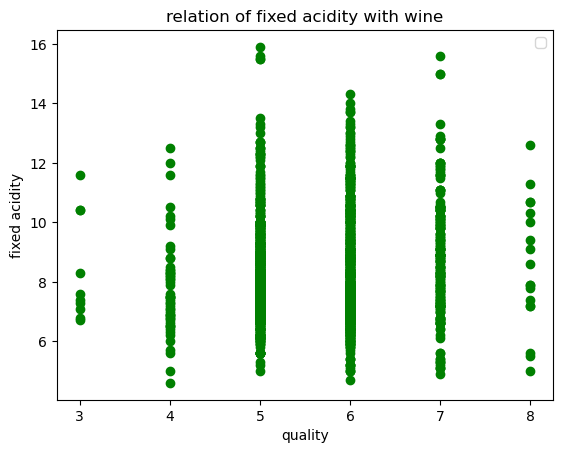

In [102]:
# checking the variation of fixed acidity in the different qualities of wine
plt.scatter(df['quality'], df['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

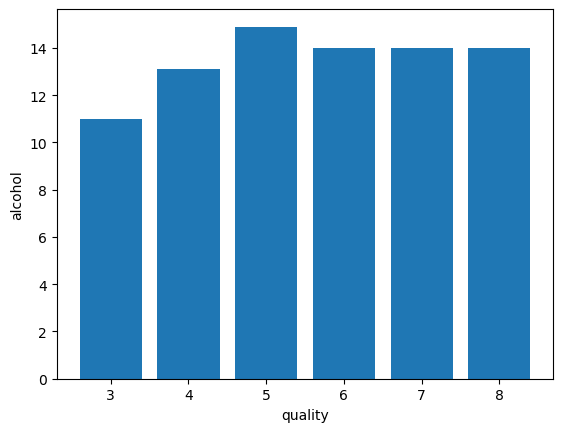

In [103]:
# checking the variation of Alcohol in the different qualities of wine
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<Axes: xlabel='quality', ylabel='citric acid'>

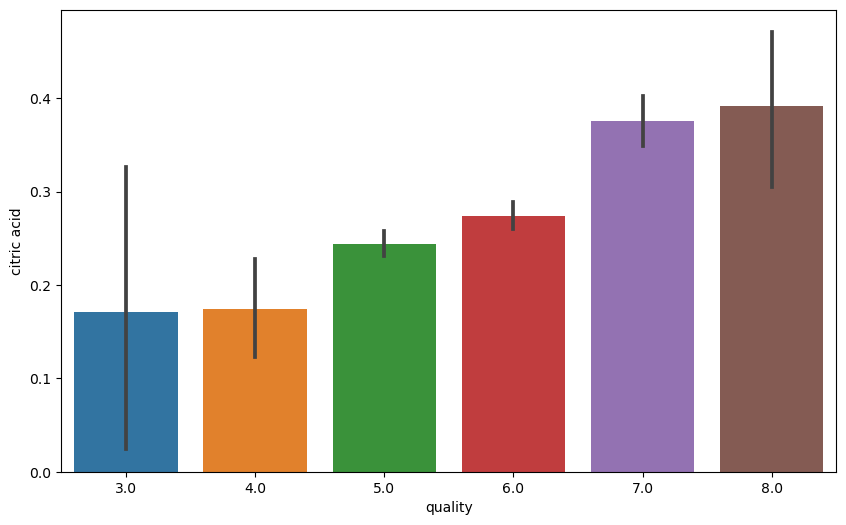

In [104]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'citric acid', data = df)


composition of citric acid go higher as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='residual sugar'>

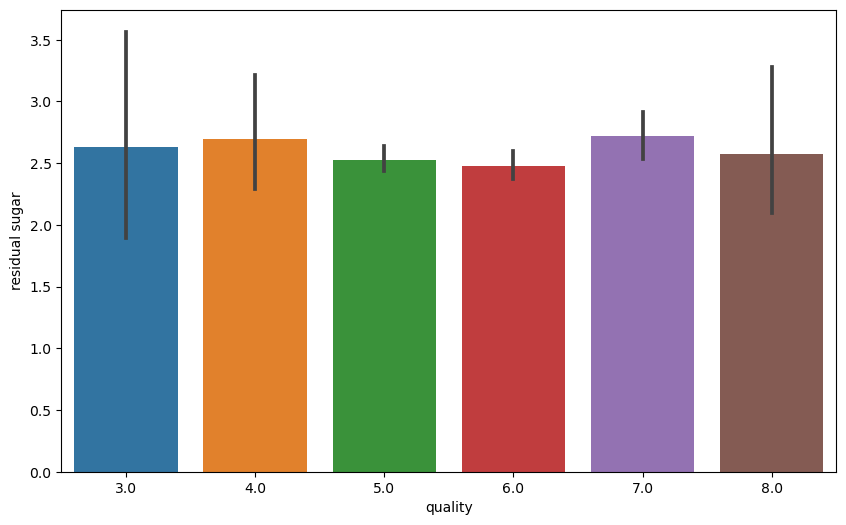

In [105]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

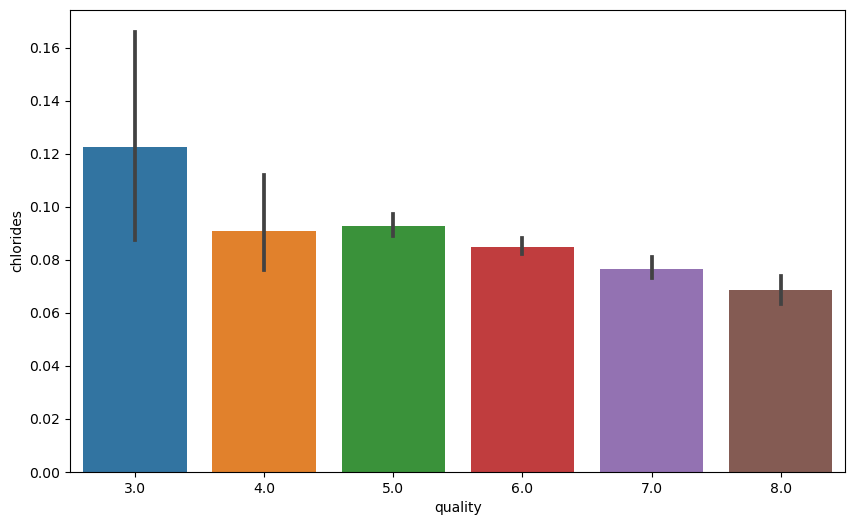

In [106]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'chlorides', data = df)

Composition of chloride also go down as we go higher in the quality of the wine

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

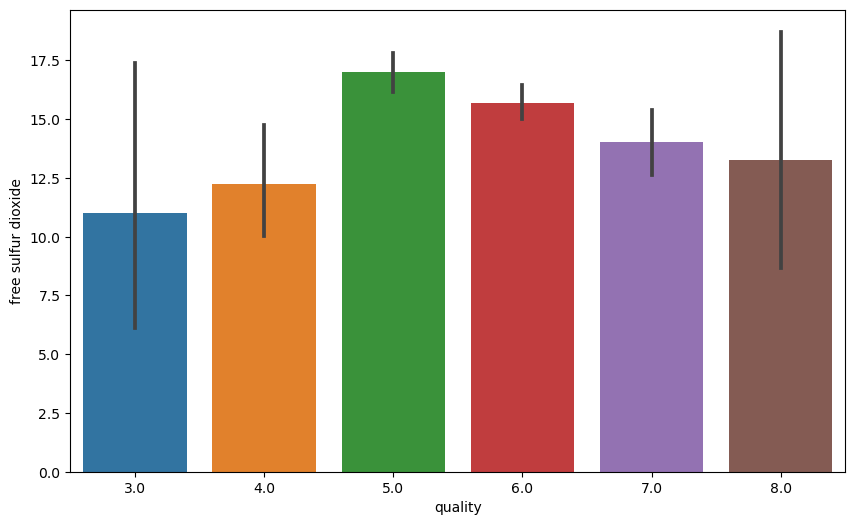

In [107]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: xlabel='quality', ylabel='sulphates'>

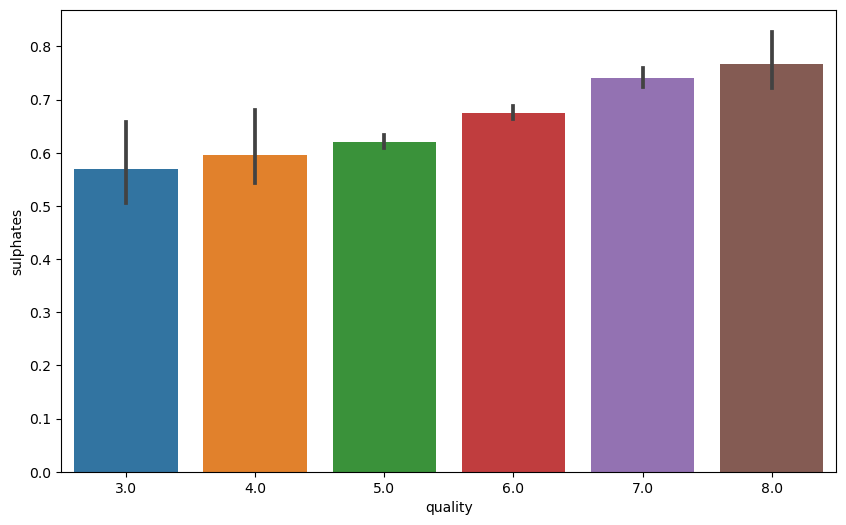

In [108]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'sulphates', data = df)

Sulphates level goes higher with the quality of wine

We must display a correlation plot to determine which items are more and less related to the dependent variable because it is clear that the two items mentioned above do not have a very strong relationship to the dependent variable.

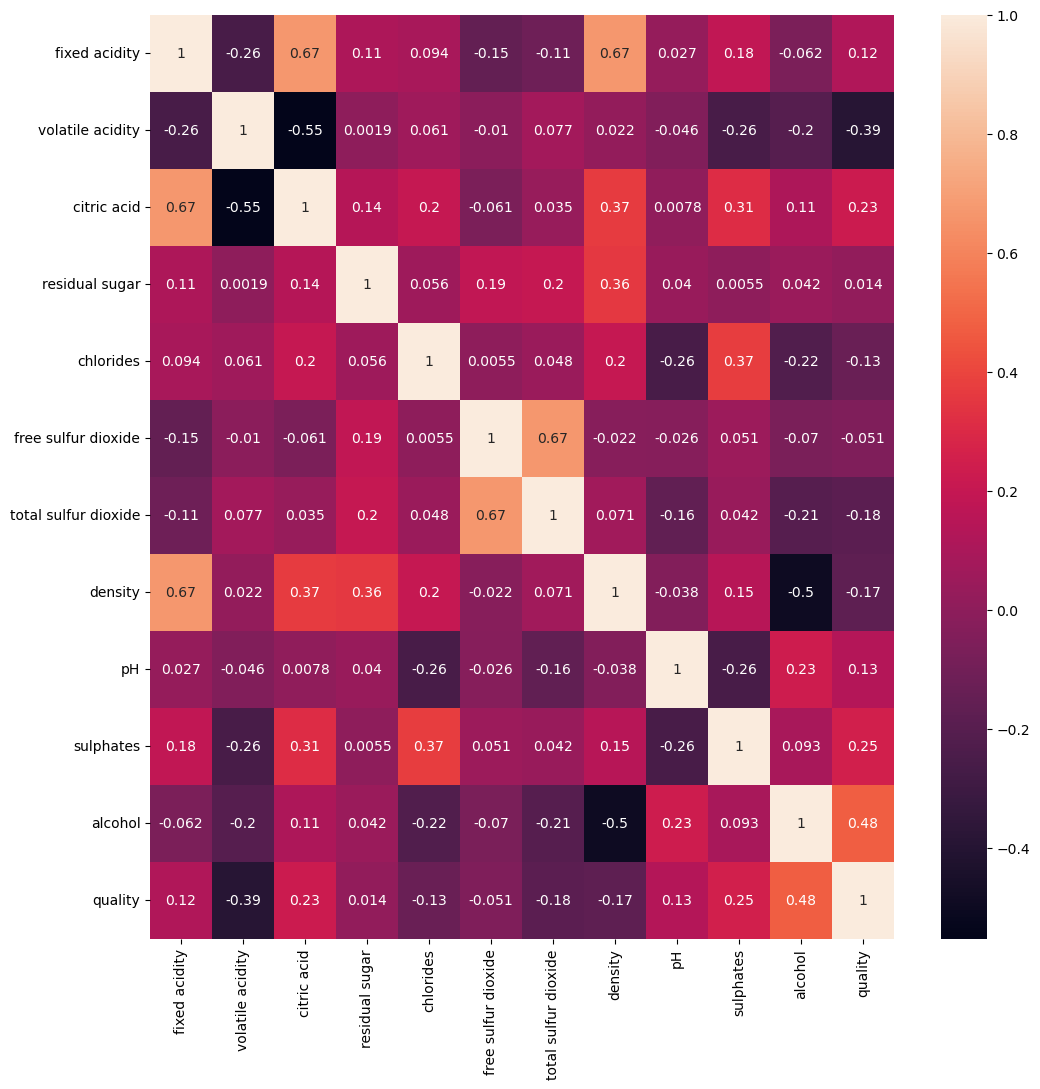

In [109]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() , annot=True, cbar=True)
plt.show()


#The strongly correlated items are :

1.fixed acidity and citric acid
2.free sulphur dioxide and total sulphor dioxide 
3.fixed acidity and density 
4.alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

#The weekly correlated items are :

1.citric acid and volatile acidity. 
2.fixed acidity and ph. 
3.density and alcohol.

These are some relations which do not depend on each other at all.

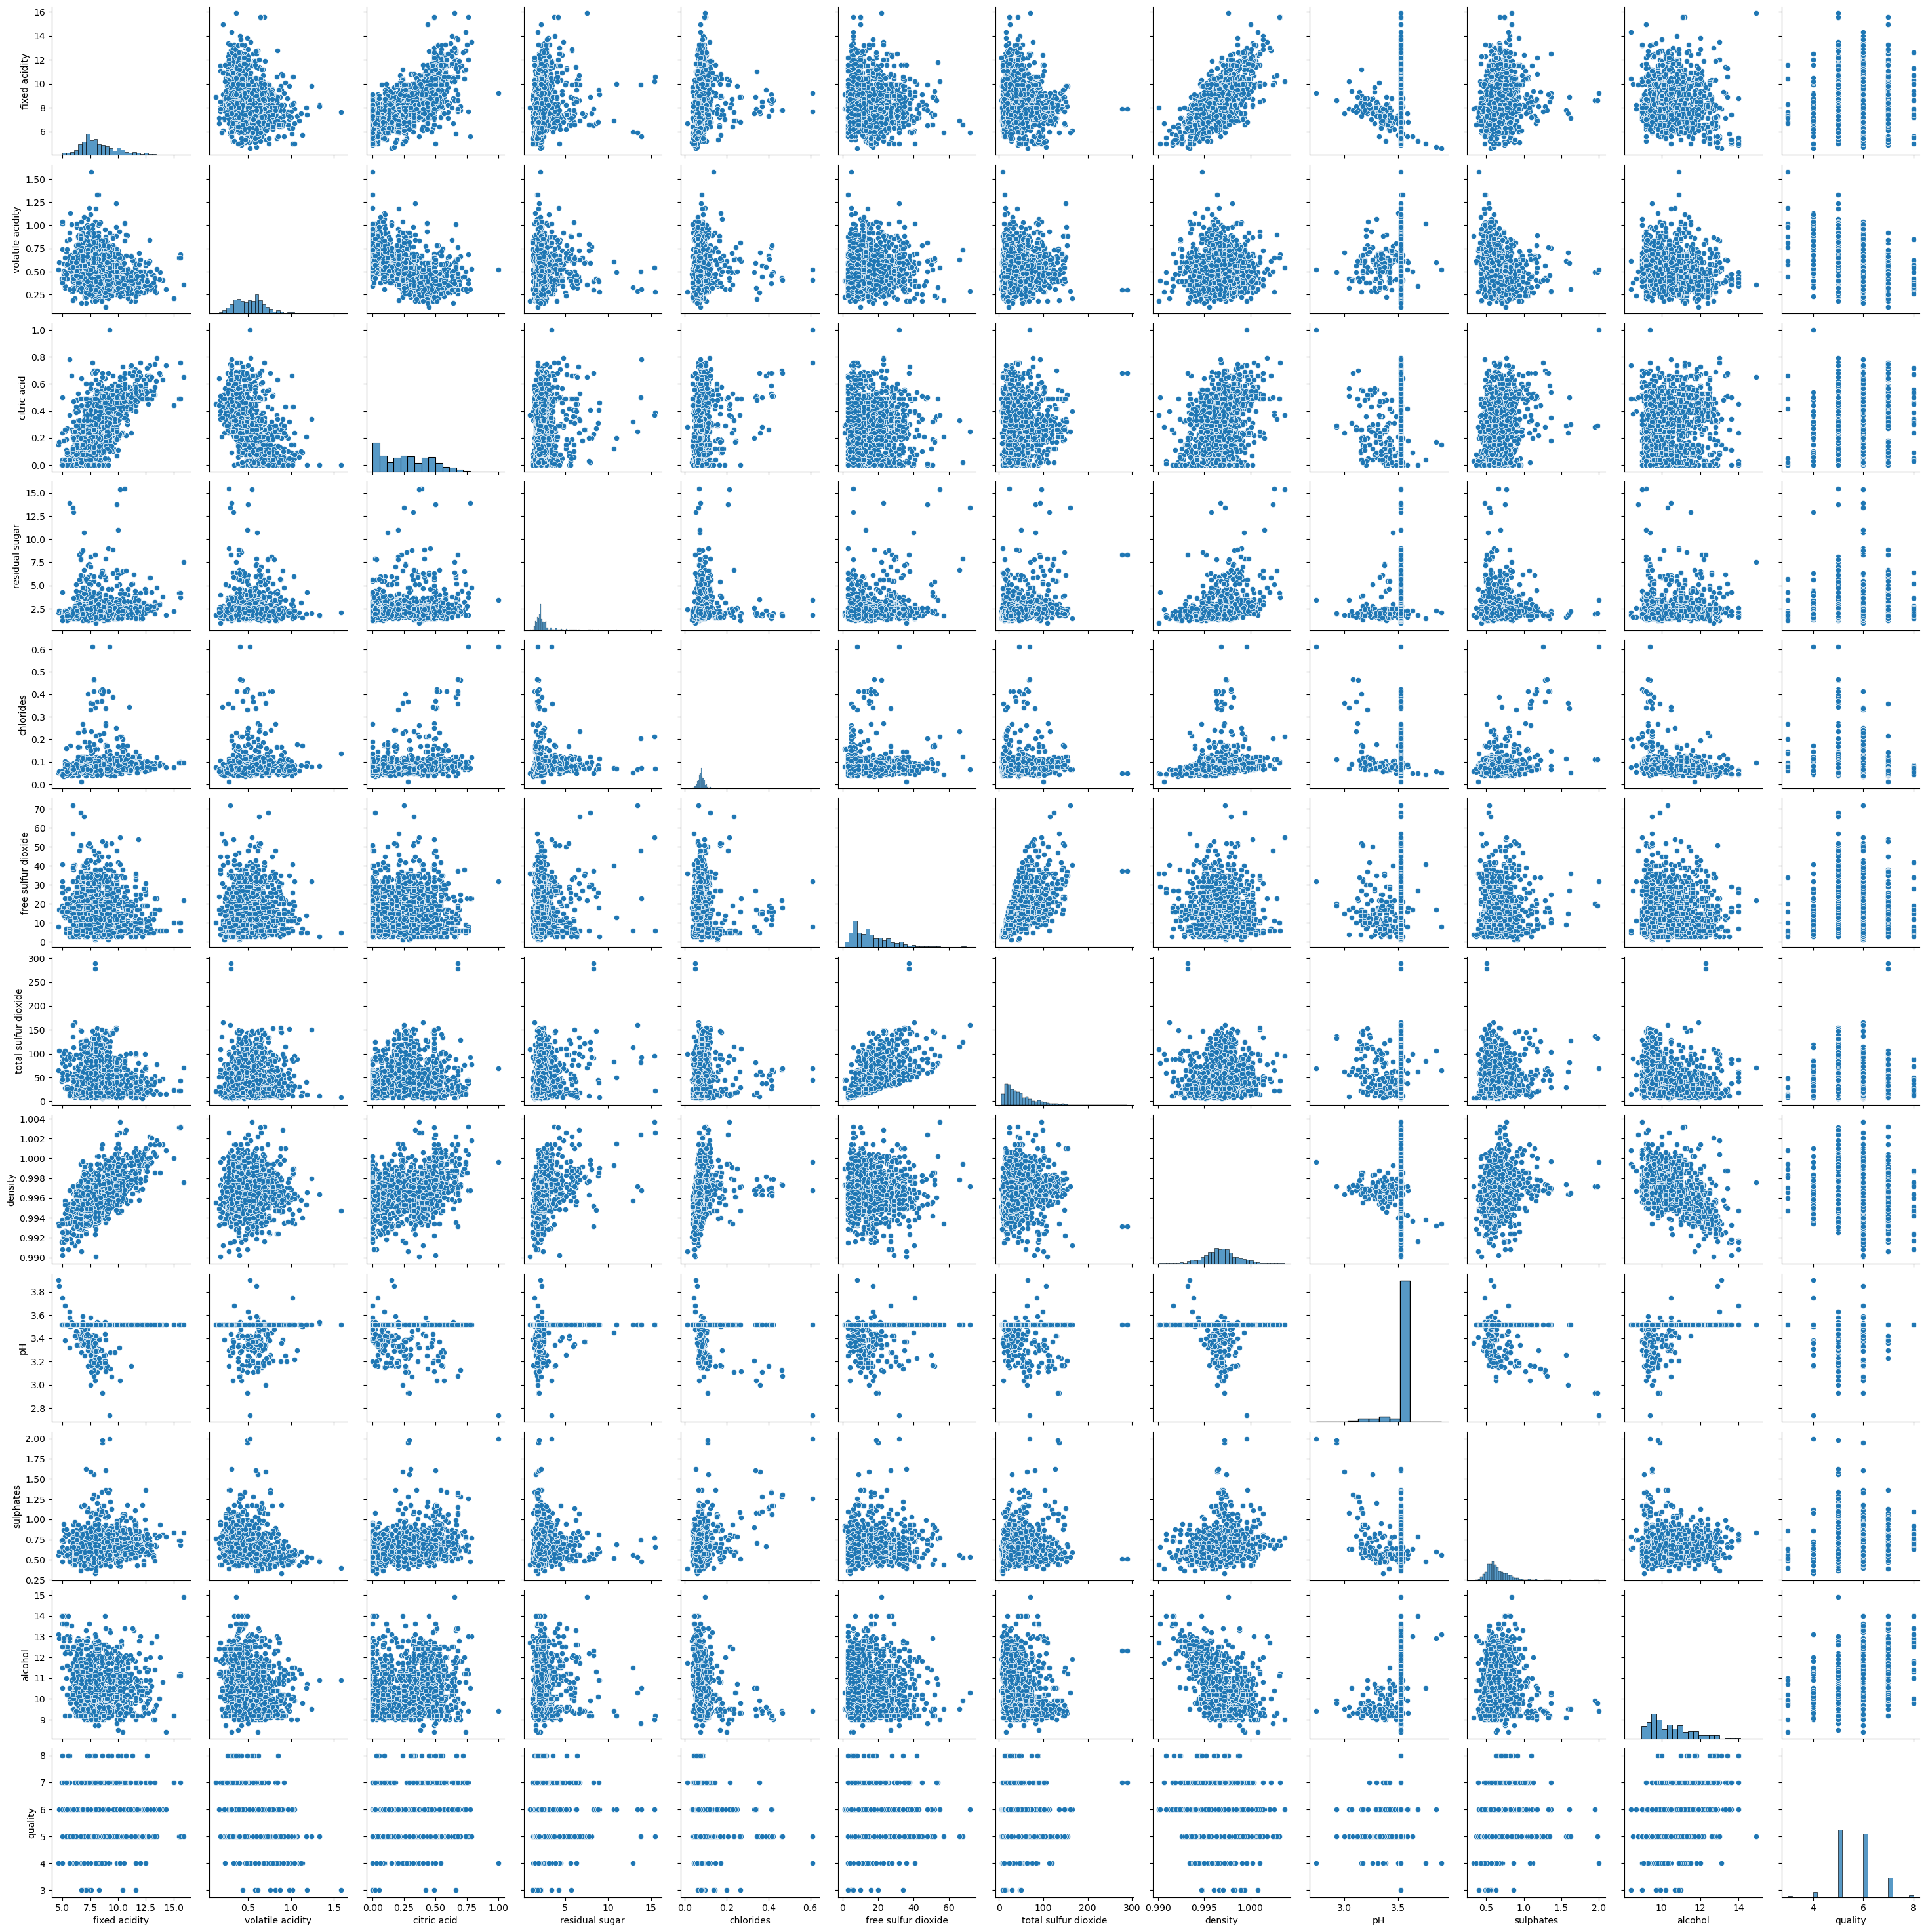

In [110]:
sb.pairplot(df)

In [111]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

Text(0, 0.5, 'count')

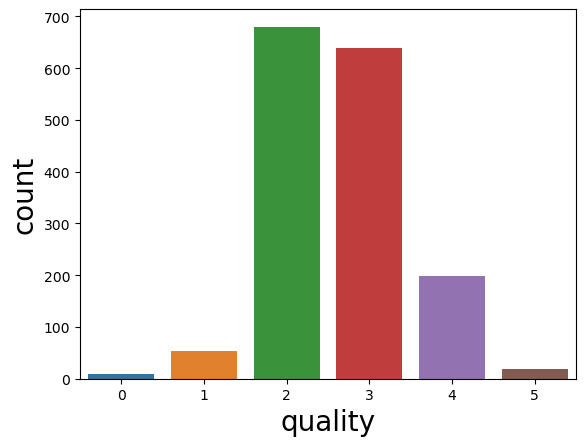

In [112]:
b = sb.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [113]:
# # converting the response variables(3-7) as binary response variables that is either good or bad

# #names = ['bad', 'good']
# #bins = (2, 6.5, 8)

# #data['quality'] = pd.cut(data['quality'], bins = bins, labels = names)

# df['quality'] = df['quality'].map({0 : 'bad', 1 :'bad', 2: 'bad',
#                                       3: 'good', 4: 'good', 5: 'good'})


# Create Classification version of target variable
# 1 is good
# 0 is bad
df['goodquality'] = [0 if x <= 2 else 1 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']



In [114]:
# analyzing the different values present in the dependent variable(quality column)
df['goodquality'].value_counts()

1    855
0    743
Name: goodquality, dtype: int64

In [115]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [116]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: goodquality, dtype: int64

# Feature Importance

In [117]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07471999 0.10169078 0.07615607 0.06878244 0.0734463  0.07037001
 0.10252139 0.08265727 0.03217585 0.12103071 0.19644919]


# Splitting Dataset

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=1000, test_size=598, random_state=44)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 11)
(1000,)
(598, 11)
(598,)


# Using Decision Tree:

In [119]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion='entropy',random_state=44)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(y_test, y_pred1))

Accuracy Score: 0.7224080267558528


# LogisticRegression

In [120]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7525083612040134


In [121]:
confusion_mat = confusion_matrix(y_test,y_pred2)
print(confusion_mat)

[[207  88]
 [ 60 243]]


# Using KNN:

In [122]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.6505016722408027


# Using SVC:

In [123]:
from sklearn.svm import SVC
model4 = SVC()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.6304347826086957


# Using GaussianNB:

In [124]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred5))

Accuracy Score: 0.7408026755852842



# Using Random Forest:

In [125]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred6))

Accuracy Score: 0.8110367892976589


# Using Xgboost:

In [126]:
import xgboost as xgb
model7 = xgb.XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred7))

Accuracy Score: 0.7892976588628763


# Multi Layer Perceptron

In [127]:
from sklearn.neural_network import MLPClassifier

# creating the model
model8 = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)

# calculating the accuracies
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred8))

Accuracy Score: 0.7408026755852842


# Artificial Neural Networks

In [128]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [129]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5500
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5940
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6270
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6500 - accuracy: 0.6190
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.6210
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6210
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6270
Epoch 8/100
100/100 [==============================] - 0s 986us/step - loss: 0.6379 - accuracy: 0.6260
Epoch 9/100
100/100 [==============================] - 0s 935us/step - loss: 0.6392 - accuracy: 0.6320
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6349 - ac

In [134]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost','MLPClassifier','Artificial Neural Networks'],
    'Score': [0.752,0.650,0.630,0.722,0.741,0.811,0.789,0.740,0.714]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.811,Random Forest
0.789,Xgboost
0.752,Logistic Regression
0.741,GaussianNB
0.740,MLPClassifier
0.722,Decision Tree
0.714,Artificial Neural Networks
0.650,KNN
0.630,SVC


From the above we can see that in random forest accuracy is greater than other model so i  will use Random Forest algorithms for training my model.

In [135]:
# create a new dataframe with the actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred6})

In [138]:
results_df

,Actual,Predicted
1592,1,1
1156,1,1
855,1,1
461,0,1
549,1,0
...,...,...
1168,1,1
443,1,1
1372,0,0
582,0,0


In [139]:
# save the dataframe to a CSV file
results_df.to_csv("wine_quality_predictions.csv", index=False)